# Diabetes Prediction


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Introduction

So what is diabetes and what leads to someone getting it? The following is from the Centers for Disease Control and Prevention (CDC).  

Insulin is a hormone made by your pancreas that acts like a key to let blood sugar into the cells in your body for use as energy. If you have type 2 diabetes, cells don’t respond normally to insulin; this is called insulin resistance. Your pancreas makes more insulin to try to get cells to respond. Eventually your pancreas can’t keep up, and your blood sugar rises, setting the stage for prediabetes and type 2 diabetes. High blood sugar is damaging to the body and can cause other serious health problems, such as heart disease, vision loss, and kidney disease.

Type 2 diabetes symptoms often develop over several years and can go on for a long time without being noticed (sometimes there aren’t any noticeable symptoms at all). Because symptoms can be hard to spot, it’s important to know the risk factors and to see your doctor to get your blood sugar tested if you have any of them.

The data set we will be using is the PIMA Indian Diabetes data set. The PIMA Indians are a tribe in Arizona and more about their history can be found here https://en.wikipedia.org/wiki/Pima_people

The data set consist of females over the age of 21. There are a total of 9 features including outcome, which is what we will be trying to predict

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function(A function that scores the likelihood of diabetes based on family history)
8. Age (years)
9. Outcome (0 or 1)

# Importing libraries

In [1]:
#Importing the necessary python libraries
import numpy as np
import pandas as pd

# Creating the dataset

In [2]:
#Creating the data
diabetes_data = pd.read_csv(r'C:\Users\Downloads\diabetes.csv')

In [3]:
#Reading the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Observing the shape of dataframe

print(diabetes_data.shape)

(768, 9)


As it is observed above that we have 768 rows and 9 columns.   
The first 8 columns represent the features and the last column represent the target/label.

# Basic EDA & statistical analysis

Exploratory Data Analysis or EDA , is an important step to be performed in Data Science projects.
EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

In [5]:
# Using the describe we will try and gain more insights of our data:
#for descriptive statistics of the data 
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#For complete information about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#for datatypes in the data
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#Finding missing values
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
#To check if there are any special characters in place of values 
for i in diabetes_data.columns:
    print({i:diabetes_data[i].unique()})

{'Pregnancies': array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)}
{'Glucose': array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)}
{'BloodPressure': array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  8

There are no missing values or any unique values available in the data but, there are some values which are termed as zero(0). 
From the above columns some columns such as-
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI,  
have zero values which does not make any sense as these values can't be 0.  
So,we will consider these zero values as missing values.  

It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with some suitable values.


In [10]:


diabetes_data_df = diabetes_data.copy(deep = True)
diabetes_data_df[['Glucose','BloodPressure',
                    'SkinThickness','Insulin','BMI']] = diabetes_data_df[['Glucose','BloodPressure','SkinThickness',
                                                                            'Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


To fill up these NaN values understanding the data distribution is necessary

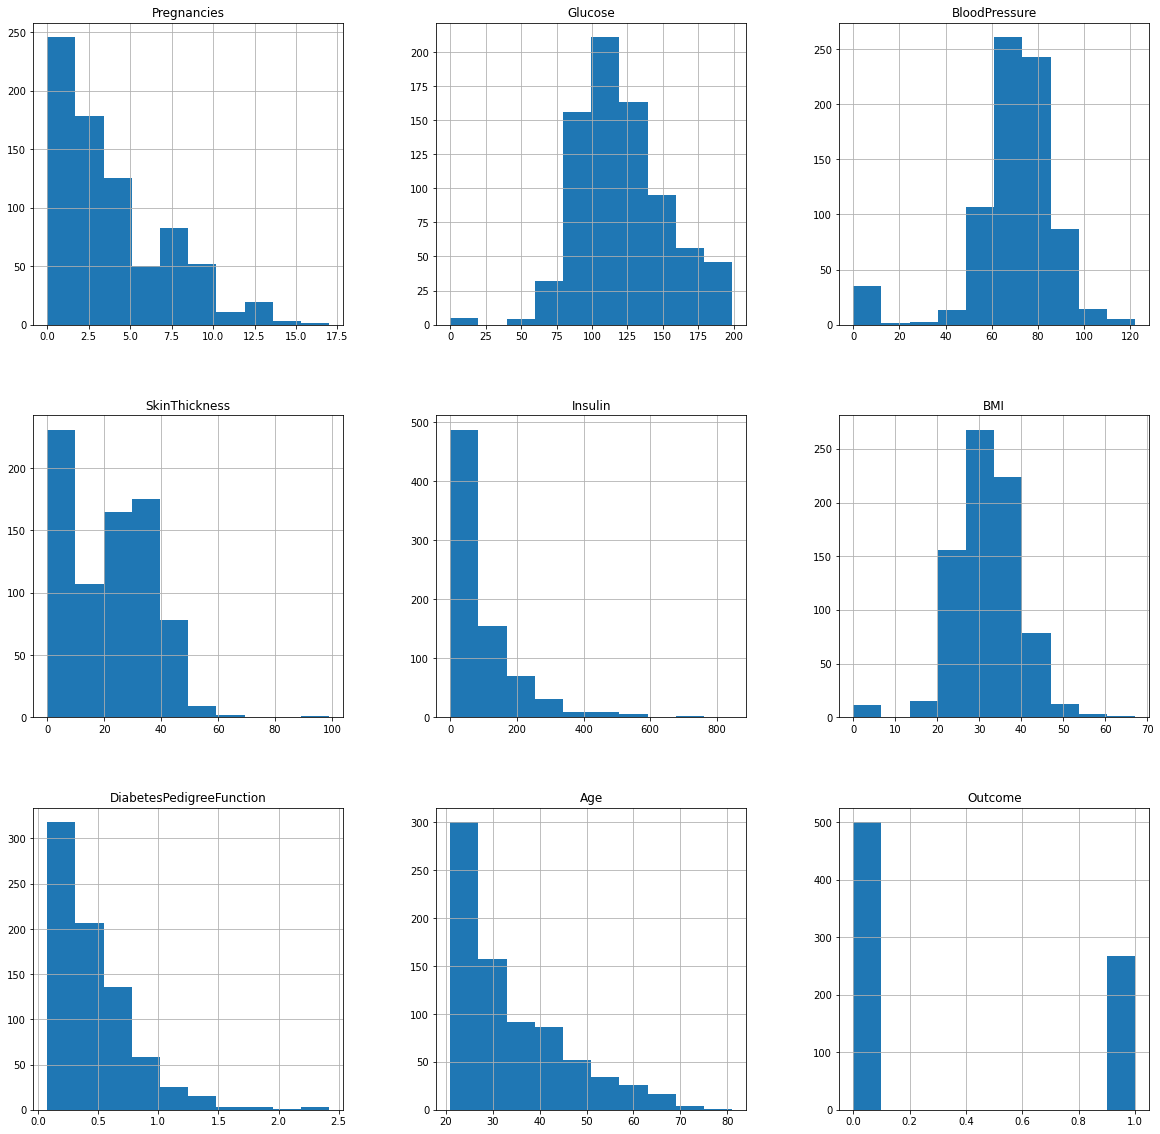

In [11]:
x = diabetes_data.hist(figsize = (20,20))

# Imputing NaN values

In [12]:
diabetes_data_df['Glucose'].fillna(diabetes_data_df['Glucose'].mean(), inplace = True)

diabetes_data_df['BloodPressure'].fillna(diabetes_data_df['BloodPressure'].mean(), inplace = True)

diabetes_data_df['SkinThickness'].fillna(diabetes_data_df['SkinThickness'].median(), inplace = True)

diabetes_data_df['Insulin'].fillna(diabetes_data_df['Insulin'].median(), inplace = True)

diabetes_data_df['BMI'].fillna(diabetes_data_df['BMI'].median(), inplace = True)

In [13]:
diabetes_data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Plotting after removal removal of NaN values.

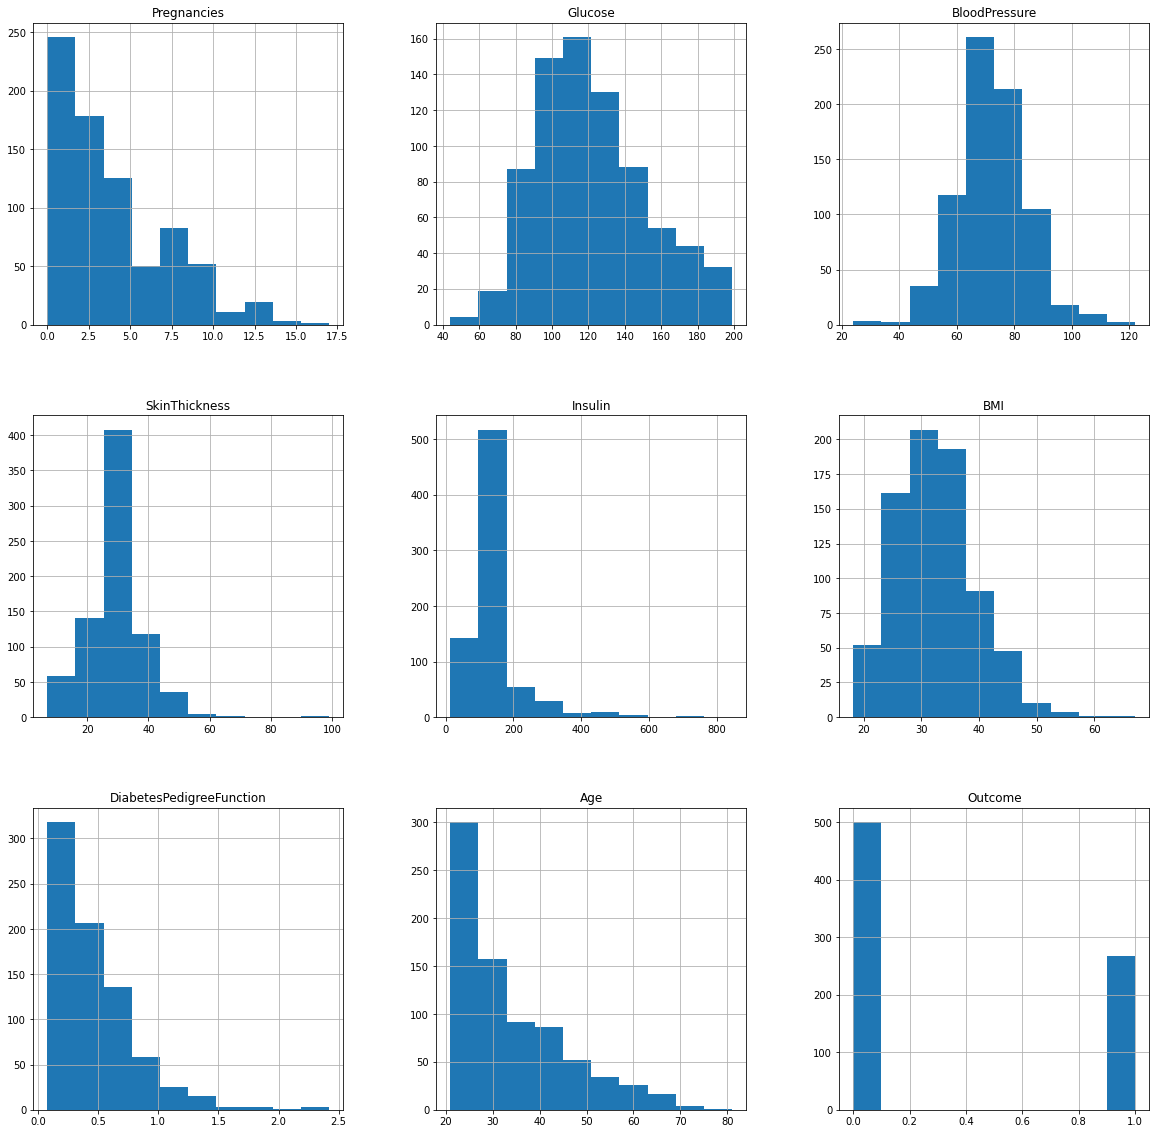

In [14]:
x = diabetes_data_df.hist(figsize = (20,20))

##### Heatmap map for unclean data

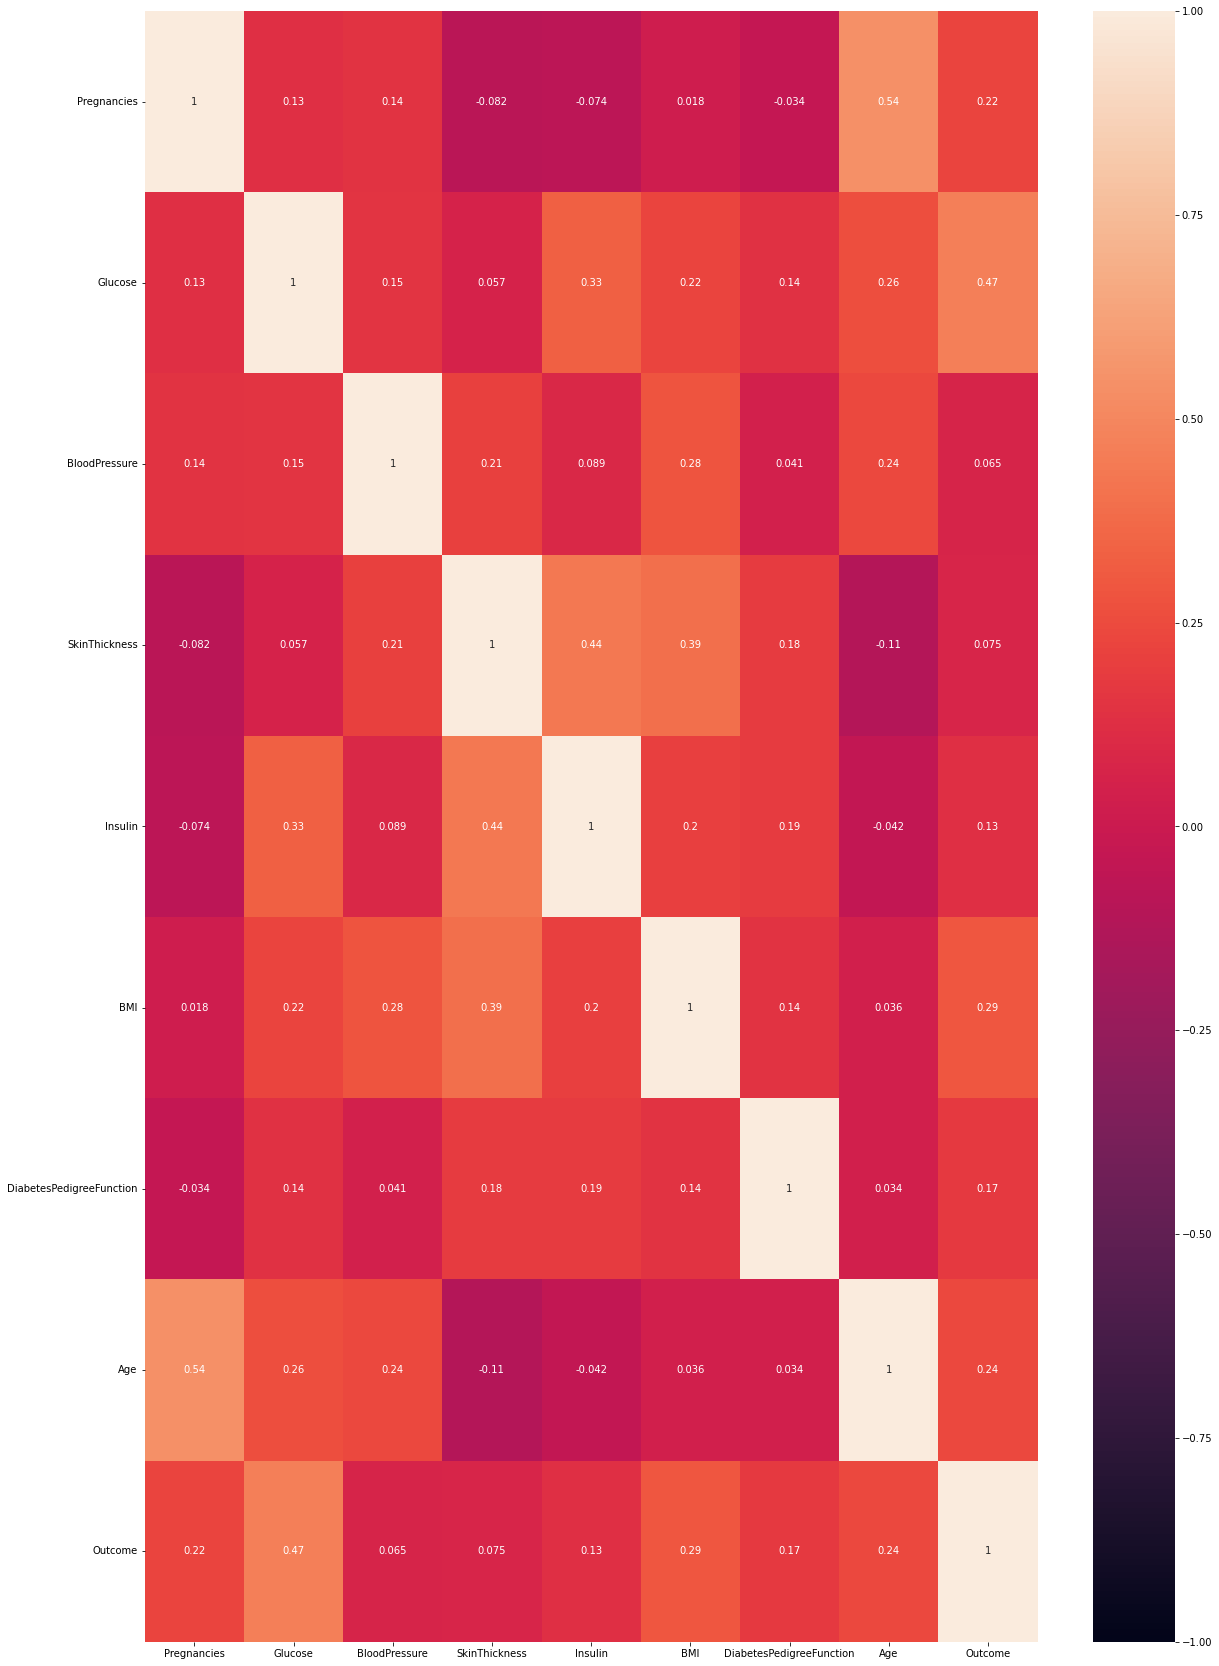

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes_data.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

#### Heatmap for clean data

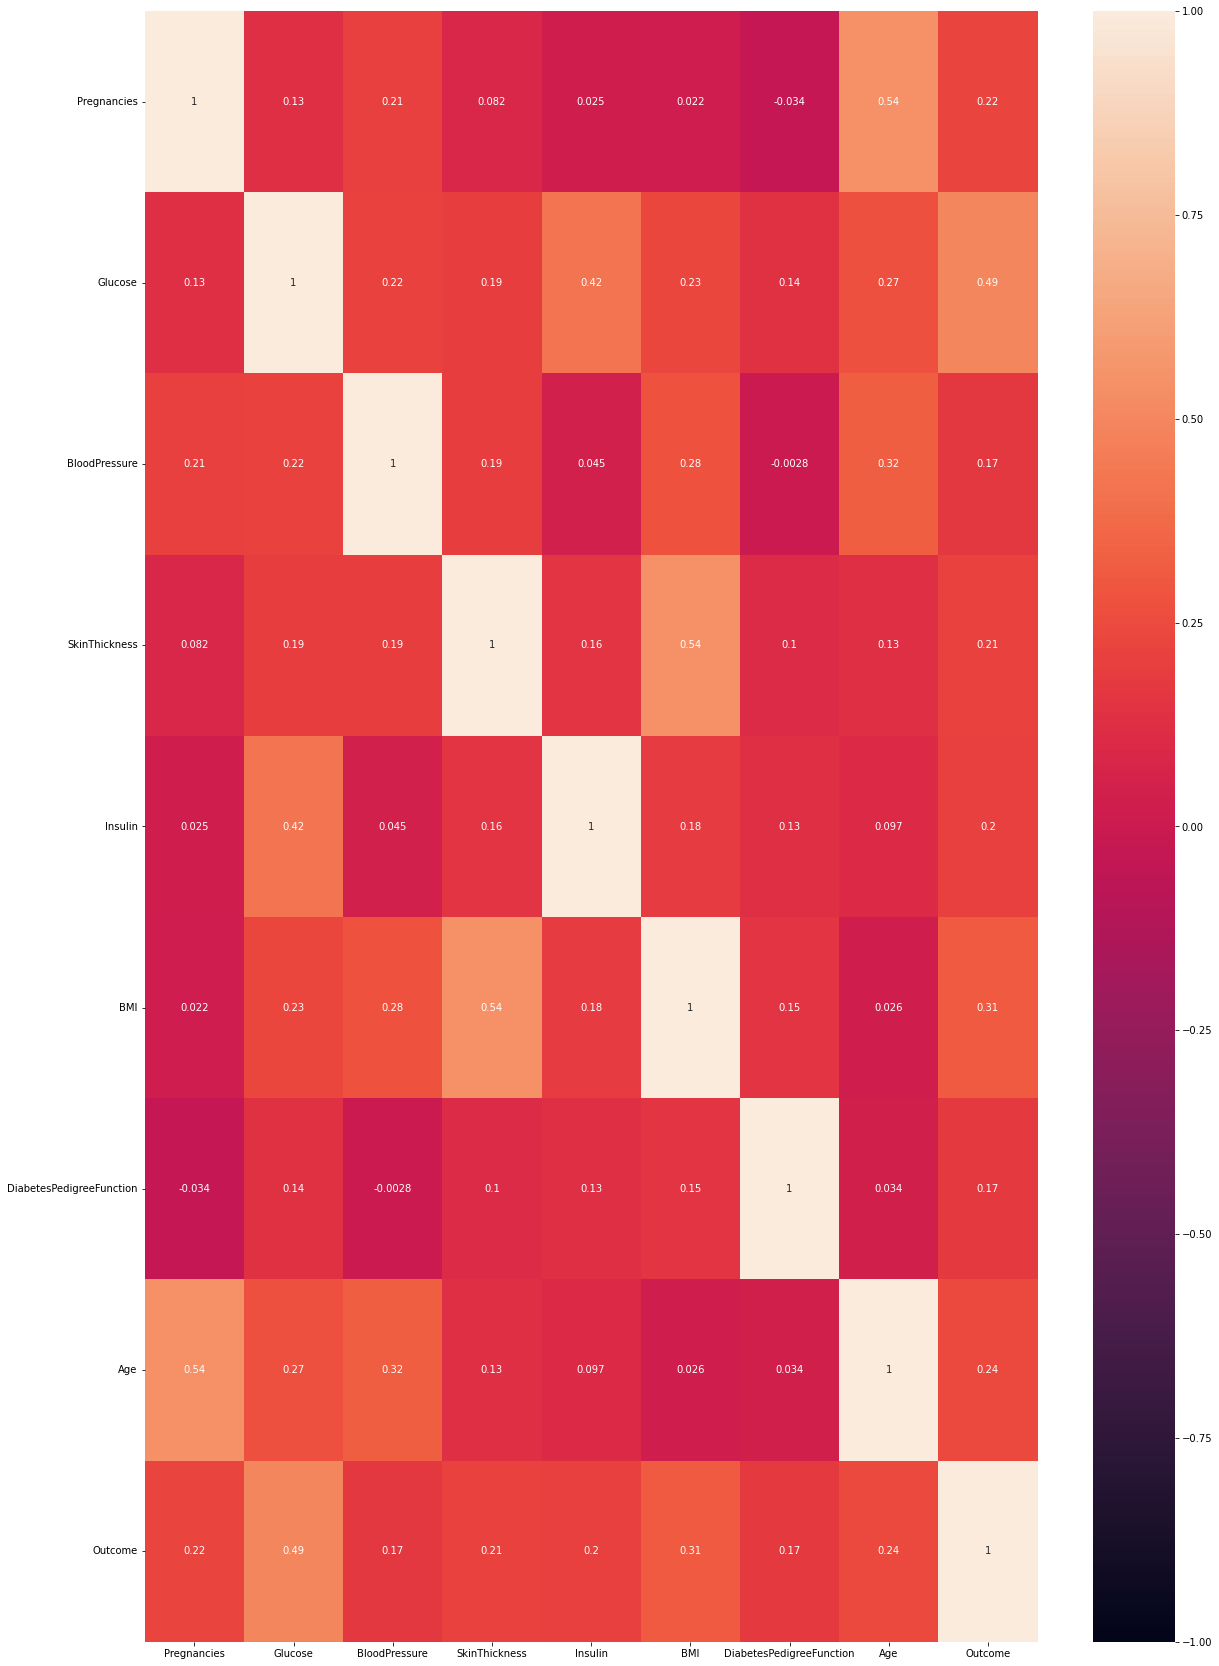

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes_data_df.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

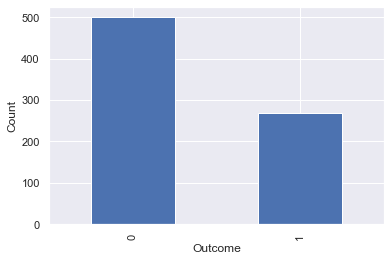

In [17]:
sns.set()
price_plot=diabetes_data_df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### From the above graph it is understood that the data is biased towards datapoints having the outcome value as 0 which  means that the non-diabetic patients were more in number as compared to that of the diabetic patients.

# Creating X & Y variables  for predictions

In [18]:
#Create X & Y 
X = diabetes_data_df.values[:,0:-1]
Y = diabetes_data_df.values[:,-1]

In [19]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


# Scaling the X variables

As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.  
So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range.  
This will help us to use distance metrics

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

# Train_test_splitting

In [21]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# Building base model with KNN

### 1. Euclidean distance metric

In [23]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

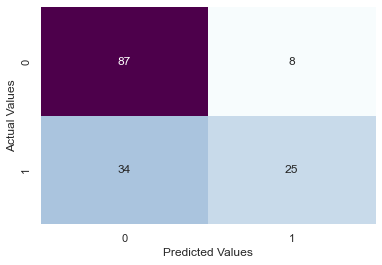

Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        95
         1.0       0.76      0.42      0.54        59

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.67       154
weighted avg       0.73      0.73      0.71       154

Accuracy of the model:  0.7272727272727273


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### 2. Manhattan Distance metric

In [25]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [26]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

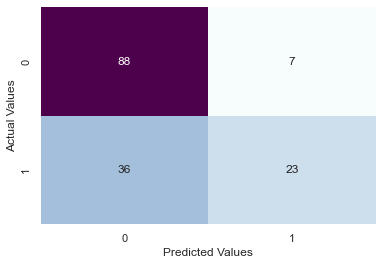

Classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80        95
         1.0       0.77      0.39      0.52        59

    accuracy                           0.72       154
   macro avg       0.74      0.66      0.66       154
weighted avg       0.73      0.72      0.69       154

Accuracy of the model:  0.7207792207792207


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### 3. Minkowski distance metric

In [28]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [29]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='minkowski')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

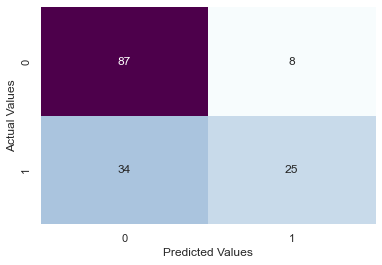

Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        95
         1.0       0.76      0.42      0.54        59

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.67       154
weighted avg       0.73      0.73      0.71       154

Accuracy of the model:  0.7272727272727273


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#### From all the distance metrics used for building the base model Euclidean & Manhattan showed less no. of Type II errors i.e.people who are diabetic are assumed as non - diabetic

# Hyper parameter tuning

In [31]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,10):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric='euclidean')
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.7012987012987013 for K-Value: 1
Accuracy is 0.7207792207792207 for K-Value: 2
Accuracy is 0.7077922077922078 for K-Value: 3
Accuracy is 0.7272727272727273 for K-Value: 4
Accuracy is 0.7337662337662337 for K-Value: 5
Accuracy is 0.7207792207792207 for K-Value: 6
Accuracy is 0.7207792207792207 for K-Value: 7
Accuracy is 0.6883116883116883 for K-Value: 8
Accuracy is 0.7077922077922078 for K-Value: 9


In [32]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

5 : 0.7337662337662337


In [33]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

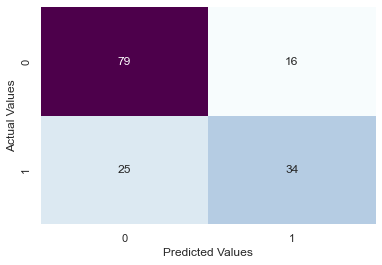

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        95
         1.0       0.68      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

As the Type II errors or we can say the patients who were diabetic but were detected as non - diabetic were still in no but still we can see the recall value was seemed to be inclined more towards "0" i.e. the patients who were non-diabetic.

# Opyimization techniques - Implementation of SMOTE

In [35]:
import imblearn

In [36]:
X=diabetes_data_df.values[:,:-1]      
Y=diabetes_data_df.values[:,-1]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [38]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [39]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  209
Before OverSampling, counts of label '0':  405
After OverSampling, the shape of train_X:  (810, 8)
After OverSampling, the shape of train_y:  (810,)
After OverSampling, counts of label '1':  405
After OverSampling, counts of label '0':  405


In [40]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

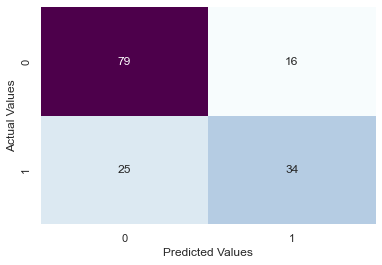

Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        95
         1.0       0.68      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

As we observed that the results before implementation on SMOTE technique were similar to that of the results observed after implementing the SMOTE technique.   
The recall value doesn't showed any change in its value.